In [1]:
!conda install -c conda-forge tensorflow --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.12.0             |     pyhd8ed1ab_0          96 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    cached-property-1.5.2      |       hd8ed1ab_1           4 KB  conda-forge
    cached_property-1.5.2      |     pyha770c72_1          11 KB  conda-forge
    gast-0.4.0                 |     pyh9f0ad1d_0          12 KB  conda-forge
    google-pasta-0.2.0         |     pyh8c360ce_0          42 KB  cond

In [2]:
!conda install -c conda-forge keras --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    keras-2.3.1                |           py36_0         591 KB  conda-forge
    libgpuarray-0.7.6          |    h7f98852_1003         245 KB  conda-forge
    pygpu-0.7.6                |py36h92226af_1002         648 KB  conda-forge
    theano-0.9.0               |           py36_1         4.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be INSTALLED:

  keras              conda-forge/linux-64::keras-2.3.1-py36_

In [3]:
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import numpy as np

Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.6/site-packag

In [4]:

l1 = l2 = l3 = 7

In [5]:
## Generating dataset for training

def three_link_manipulator_dataset():
    rows = []
    for i in range(1, 100000):
        theta1 = round(random.uniform(0, math.pi), 2)
        theta2 = round(random.uniform(-math.pi, 0), 2)
        theta3 = round(random.uniform(-math.pi/2, math.pi/2), 2)
        
        x = round(l1*math.cos(theta1)+l2*math.cos(theta1+theta2)+l3*math.cos(theta1+theta2+theta3), 2)
        y = round(l1*math.sin(theta1)+l2*math.sin(theta1+theta2)+l3*math.sin(theta1+theta2+theta3), 2)
        phi = round(math.degrees(theta1)+math.degrees(theta2)+math.degrees(theta3), 2)
        
        rows.append([theta1, theta2, theta3, x, y, phi])

    df = pd.DataFrame(rows, columns=['theta1', 'theta2', 'theta3', 'x', 'y', 'phi'])
    df.to_csv('three_link.csv', index=False)
    
three_link_manipulator_dataset()

In [6]:
three_link_data = pd.read_csv('three_link.csv')
three_link_data.head()

,theta1,theta2,theta3,x,y,phi
0,0.89,-0.43,0.39,15.30,13.81,48.70
1,0.96,-1.61,1.18,15.63,5.04,30.37
2,1.35,-1.29,0.59,14.09,11.49,37.24
3,2.27,-1.75,0.72,3.84,15.46,71.05
4,0.08,-0.38,0.03,20.41,-3.38,-15.47


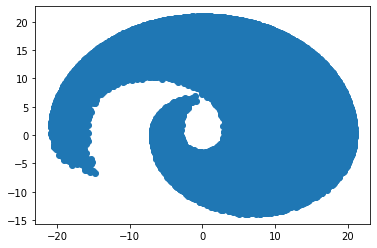

In [7]:

plt.scatter(three_link_data['x'], three_link_data['y'])
plt.show()

In [8]:
# Splitting training and testing dataset

X = three_link_data[['x', 'y', 'phi']]
y = three_link_data[['theta1', 'theta2', 'theta3']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)

In [9]:
# Defining model

model = models.Sequential()
model.add(layers.Dense(units=3, input_dim=3, kernel_initializer='uniform'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=3, kernel_initializer = 'uniform', activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 20,915
Trainable params: 20,915
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [11]:
# Training model

history = model.fit(train_X, train_y, epochs=30, validation_split=0.1, shuffle=True)


Train on 80999 samples, validate on 9000 samples
Epoch 1/30
80999/80999 [==============================] - 11s 141us/step - loss: 0.1747 - accuracy: 0.9387 - val_loss: 0.0472 - val_accuracy: 0.9568
Epoch 2/30
80999/80999 [==============================] - 10s 129us/step - loss: 0.0359 - accuracy: 0.9652 - val_loss: 0.0353 - val_accuracy: 0.9611
Epoch 3/30
80999/80999 [==============================] - 10s 123us/step - loss: 0.0262 - accuracy: 0.9715 - val_loss: 0.0311 - val_accuracy: 0.9667
Epoch 4/30
80999/80999 [==============================] - 10s 121us/step - loss: 0.0220 - accuracy: 0.9765 - val_loss: 0.0219 - val_accuracy: 0.9688
Epoch 5/30
80999/80999 [==============================] - 9s 114us/step - loss: 0.0199 - accuracy: 0.9774 - val_loss: 0.0200 - val_accuracy: 0.9832
Epoch 6/30
80999/80999 [==============================] - 9s 113us/step - loss: 0.0190 - accuracy: 0.9786 - val_loss: 0.0183 - val_accuracy: 0.9849
Epoch 7/30
80999/80999 [==============================] - 

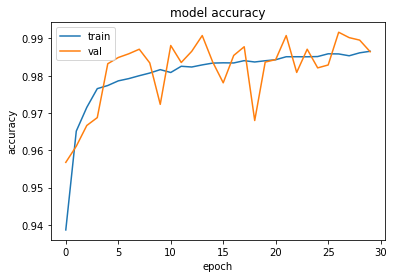

In [12]:
# Plotting model accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

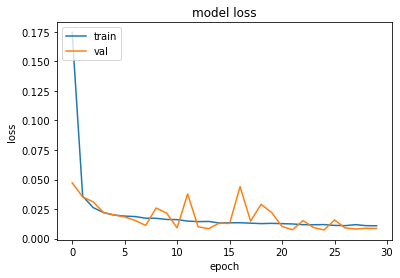

In [13]:
# Plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# Evaluating the model on test set

test_loss, test_acc = model.evaluate(test_X, test_y)

print('\nTesting Loss = ', test_loss) 
print('Testing Accuracy = ', test_acc)

10000/10000 [==============================] - 0s 29us/step

Testing Loss =  0.008107058179378509
Testing Accuracy =  0.9828000068664551


In [15]:
def iiitm_dataset():
    rows = []

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 8
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for T
    arr = np.linspace(9, 10, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 9.5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    # for M
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 11
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((-y)+29)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((y)+19)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 13
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('iiitm.csv', index=False)
    
iiitm_dataset()

In [16]:
def three_link_forward_kinematics(theta1, theta2, theta3):
    x = (np.cos(theta1)*l1)+(np.cos(theta1+theta2)*l2)+(np.cos(theta1+theta2+theta3)*l3)
    y = (np.sin(theta1)*l1)+(np.sin(theta1+theta2)*l2)+(np.sin(theta1+theta2+theta3)*l3)

    return x, y

In [17]:
iiitm_data = pd.read_csv('iiitm.csv')
iiitm_predictions = model.predict(iiitm_data.values)
x_predictions, y_predictions = three_link_forward_kinematics(iiitm_predictions[:,0], iiitm_predictions[:,1], iiitm_predictions[:,2])

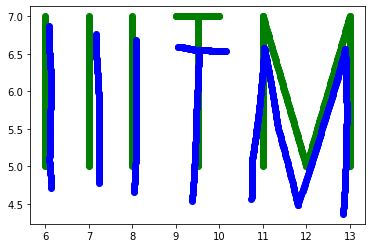

In [18]:
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

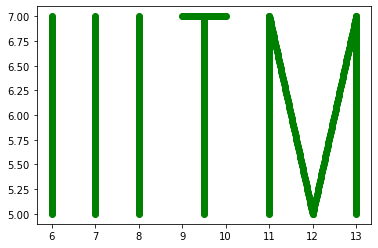

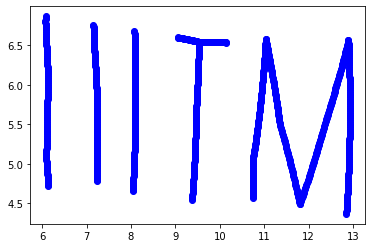

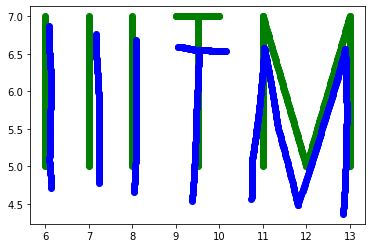

In [19]:
# Original
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.show()

# Predicted
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

# Original and Predicted
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()